In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

# Import LogoMaker
import logomaker

%matplotlib inline
plt.ion()

In [2]:
# Read in sortseq data
wtseq = 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
L = len(wtseq)
poss = range(-L,0)
df_wt = pd.read_csv('data/full-wt-formatted.txt', delim_whitespace=True)
df_0 = pd.read_csv('data/full-0-formatted.txt', delim_whitespace=True)

In [15]:
parameters_text = """
colors : 'tomato'
logo_type : 'enrichment'
enrichment_centering : True
highlight_sequence : 'AATTAATGTGAGTTAGCTCACTCATTAGGCACCCCAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'
xtick_spacing : 10
show_gridlines : True
gridline_alpha : .5
gridline_axis : 'x'
xtick_anchor : 5
highlight_colors : 'white'
shift_first_position_to : 0
font_family : 'sans'
font_weight : 'heavy'
below_flip : False
stack_order : 'big_on_top'
#show_binary_yaxis : True
ylabel : 'enrichment'
title : 'A title the user can edit'
"""
style_file = 'parameters_file.txt'
with open(style_file,'w') as f:
    f.write(parameters_text)

In [16]:
# Load counts matrix from files
counts_wt_mat = logomaker.load_alignment(sequences=df_wt['seq'], sequence_counts=df_wt['ct_9'])
counts_0_mat = logomaker.load_alignment(sequences=df_0['seq'], sequence_counts=df_0['ct_4'])
bg_mat = logomaker.load_alignment(sequences=df_wt['seq'], sequence_counts=df_wt['ct_0'])

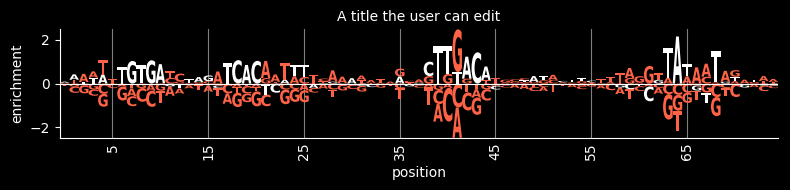

In [17]:
# Make logos
logo1 = logomaker.make_styled_logo(style_file=style_file, print_params=False, style_sheet='dark_background',
                                   matrix=counts_wt_mat, background=bg_mat, figsize=[8,2])
# logo2 = logomaker.make_styled_logo(style_file=style_file, print_params=False, 
#                                    matrix=counts_0_mat, background=bg_mat)